<a href="https://colab.research.google.com/github/LoveyThePigeon/GAM-for-Air-Pollution-Prediction/blob/main/GAMs_for_Air_Pollution_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################################################################################
# Data split into TRAIN AND TEST, contains new code, most old split removed
# No changes in cell with findings only (need to update, didn't have time), GAMS tuned and findings in cell with code show new values
# Overall GAM values WORST that with split 60%, 20%, 20%
# Fixed boxplots and partial dependence plots, added single predicted vs actual plots
# Added other statistics
################################################################################################

In [ ]:
# 1. LOADING DATA FROM "PM10 air pollution.xlsx"
"""
Findings: 1095 rows, 11 columns, last column PM10 - y
Checking for outliers - visible outliers, however this is weather data which is often unpredictable, so we are keeping all data
"""
# 2. # SPLITTING DATA 60% - TRAIN, 20% - VALIDATE, 20% - TEST
"""
Findings: Data split: train: 657, validate: 219, test: 219 rows
"""
# 3. PREPROCESSING
"""
Findings: Preprocessed with standard scaler
"""
# 4. CHECKING DISTRIBUTION FOR GAM
"""
Findings: Histogram shows tail on the right side, suggesting Gamma distribution
          KDE function confirms tail and shows that train, validate, test behave the same way,
          Q-Q plot of normal distribution is not flat, but raised above the line on both sides
          skewness shows 5.72 - tail to the right (= means symmetric, > 0 tail to the right, < 0 tail to the left), all y values are cofirmed positive (requirement for Gamma)
          all values of y are positive
          Q-Q plot for Gamma distribution confirms that Gamma is better fit
"""
# 5. SETTING UP THE GAM MODEL, FITTING, TRAINING, CHECKING RESULTS
"""
Findings: Overall findings: Based on metrics for VALIDATION set, NORMAL distribution appears to be better choice
"""
## a. Normal
"""
Findings:
===== For defaults: ======
Validation MAE: 10.414243431780504
Validation RMSE: 13.345215184369117
Validation R²: 0.45667658161922586

Test MAE: 10.153362530604754
Test RMSE: 14.375904927571652
Test R²: 0.4523946604236567

===== Tuning: for lam = [35, 70] =====
[[np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)]]

Validation MAE: 9.367897732609359
Validation RMSE: 12.32485430135225
Validation R²: 0.5365841854479299 <===

Test MAE: 9.328121702533512
Test RMSE: 13.195446091358482
Test R²: 0.5386341515153062
"""
## b. Gamma
"""
Findings:
===== For defaults =====
Validation MAE: 10.106722495367285
Validation RMSE: 13.565756054293036
Validation R²: 0.43857044812864543

Test MAE: 9.301673017566701
Test RMSE: 13.488316090536276
Test R²: 0.517927053577327

===== Tuning: for lam = [35, 70] =====
[[np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)]]

Validation MAE: 9.578659857788022
Validation RMSE: 12.841379189145238
Validation R²: 0.49692747044373253 <===

Test MAE: 9.080696917870128
Test RMSE: 12.880167750389928
Test R²: 0.5604175666292098

"""
# 6. LINEAR REGRESSION
"""
Findings:
Defaults:
Validation MAE: 9.863943254894515
Validation RMSE: 13.414917594066392
Validation R²: 0.4509861747626672

Test MAE: 9.364195884679772
Test RMSE: 13.08551276609917
Test R²: 0.546289551047396

"""
# 7. RANDOM FOREST
"""
Findings:
Validation MAE: 10.31728524543379
Validation RMSE: 16.237391876373135
Validation R²: 0.19565974058557334

Test MAE: 11.90439604737443
Test RMSE: 20.968070060257354
Test R²: -0.16496856928987258

After tuning:
Validation MAE: 9.741866589464983
Validation RMSE: 14.094400343057895
Validation R²: 0.3939611450312881

Test MAE: 10.873283599074258
Test RMSE: 16.550293405305123
Test R²: 0.27421383560963153
"""
# 7. OVERALL PERFORMANCE (BASED ON VALIDATION R^2)
'''
Best: Linear GAM
      Gamma GAM
      Linear Regression
      Random Forest
'''


'\nBest: Linear GAM\n      Gamma GAM\n      Linear Regression\n      Random Forest\n'


########## FIRST 5 ROWS ##########



,AMP_TMP,CO,NO,NO2,Nox,O3,RH,SO2,WD,WS,PM10
0,12.670417,0.312083,1.323333,8.376667,9.699583,33.691667,57.446250,4.658333,272.775417,3.018333,57.833333
1,14.385000,0.260000,2.504583,8.888750,11.393333,28.487500,55.859583,1.933333,276.061667,2.148333,36.125000
2,16.442083,0.405000,3.340000,11.644583,14.985000,24.254167,66.623750,2.362500,237.068750,1.344167,33.083333
3,17.459583,0.308333,4.354167,12.362500,16.715833,19.541667,78.750000,1.379167,198.881250,1.231250,28.500000
4,17.684583,0.347917,5.223750,15.370417,20.594167,20.241667,90.202917,2.570833,210.563333,1.612083,16.666667



########## DATA TYPES AND MISSING VALUES ##########

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMP_TMP  1095 non-null   float64
 1   CO       1095 non-null   float64
 2   NO       1095 non-null   float64
 3   NO2      1095 non-null   float64
 4   Nox      1095 non-null   float64
 5   O3       1095 non-null   float64
 6   RH       1095 non-null   float64
 7   SO2      1095 non-null   float64
 8   WD       1095 non-null   float64
 9   WS       1095 non-null   float64
 10  PM10     1095 non-null   float64
dtypes: float64(11)
memory usage: 94.2 KB


None


########## SIZE OF THE DATASET ##########



(1095, 11)


########## BASIC STATISTICS ##########



,AMP_TMP,CO,NO,NO2,Nox,O3,RH,SO2,WD,WS,PM10
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,22.828843,0.387619,4.538489,11.245147,15.786657,26.297643,80.052340,2.623005,190.417638,1.701850,37.979730
std,5.265242,0.125933,2.678347,3.526487,5.244985,10.448085,8.446672,1.583048,44.479622,0.675985,21.226501
min,9.225000,0.037500,0.278750,0.824167,1.103333,2.762500,46.291667,0.262500,52.464167,0.779583,3.833333
25%,18.769167,0.299792,2.663750,8.711458,12.018958,18.920833,74.203542,1.800000,159.243750,1.308333,25.312500
50%,23.010417,0.368333,3.925833,10.897500,15.344167,25.545833,80.305417,2.312500,185.715833,1.563750,34.833333
75%,27.681875,0.466667,5.904167,13.685000,19.098333,33.291667,86.273125,3.041667,220.425208,1.904167,46.479167
max,32.250000,0.938750,29.379583,27.203333,43.938333,59.208333,97.083333,22.750000,302.298333,8.609583,377.500000




########## OTHER STATISTICS ##########



,Min,Max,Mean,Median,Std,Variance,Skewness
AMP_TMP,9.225000,32.250000,22.828843,23.010417,5.265242,27.722770,-0.277533
CO,0.037500,0.938750,0.387619,0.368333,0.125933,0.015859,0.711740
NO,0.278750,29.379583,4.538489,3.925833,2.678347,7.173542,1.914839
NO2,0.824167,27.203333,11.245147,10.897500,3.526487,12.436110,0.380052
Nox,1.103333,43.938333,15.786657,15.344167,5.244985,27.509870,0.655129
O3,2.762500,59.208333,26.297643,25.545833,10.448085,109.162478,0.302287
RH,46.291667,97.083333,80.052340,80.305417,8.446672,71.346274,-0.452346
SO2,0.262500,22.750000,2.623005,2.312500,1.583048,2.506042,5.279305
WD,52.464167,302.298333,190.417638,185.715833,44.479622,1978.436771,0.187526
WS,0.779583,8.609583,1.701850,1.563750,0.675985,0.456955,3.651058


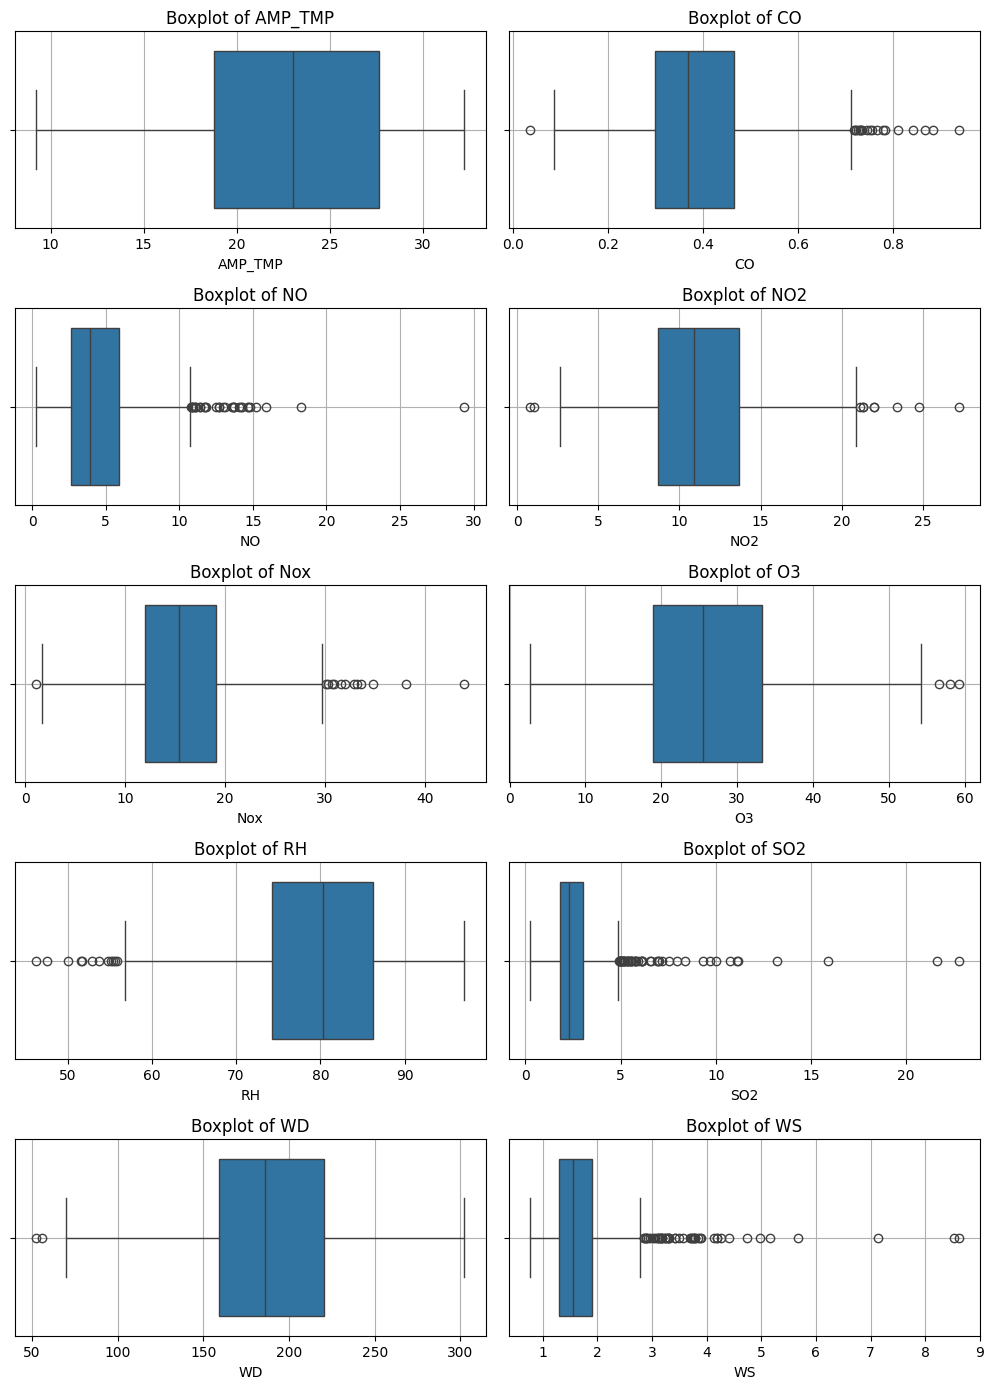



########## SPLITTING ##########

Dimensions of X: 2 2
Dimensions of y: 1 1
Sizes X rows: 876 219
Sizes X columns: 10 10
Sizes y: 876 219

########## DISTRIBUTION ##########



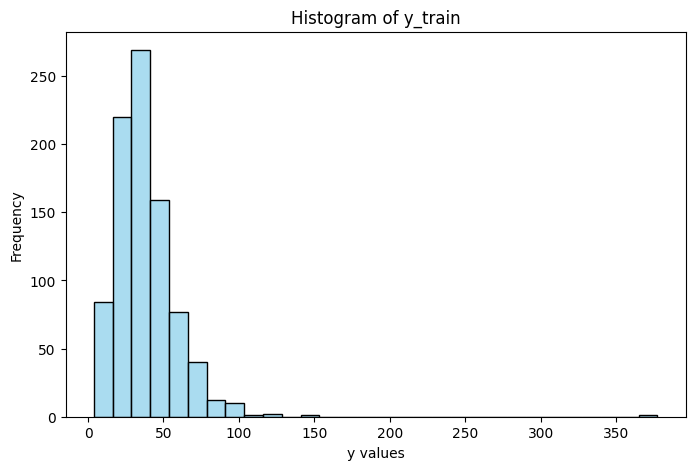

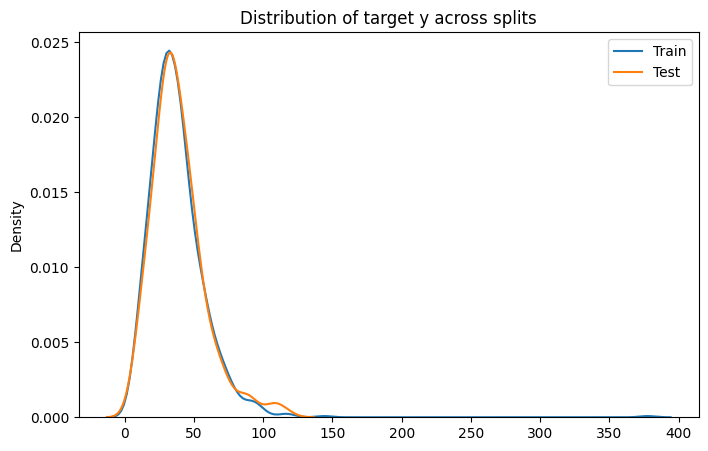

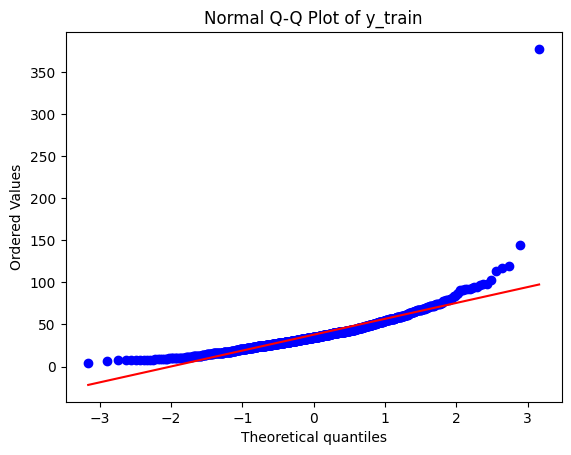

Skewness of y_train: 5.09
All positive


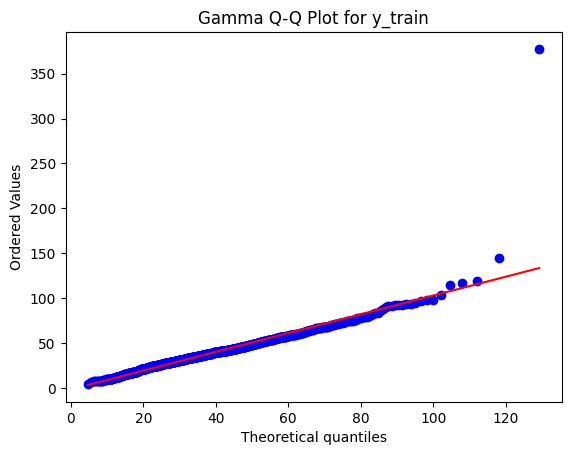


Terms:  s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)

########## LINEAR GAM SUMMARY ##########

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      37.146
Link Function:                     IdentityLink Log Likelihood:                                 -5648.0298
Number of Samples:                          876 AIC:                                            11372.3516
                                                AICc:                                           11375.9204
                                                GCV:                                              271.9862
                                                Scale:                                            251.3079
                        

/tmp/ipython-input-258787602.py:239: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


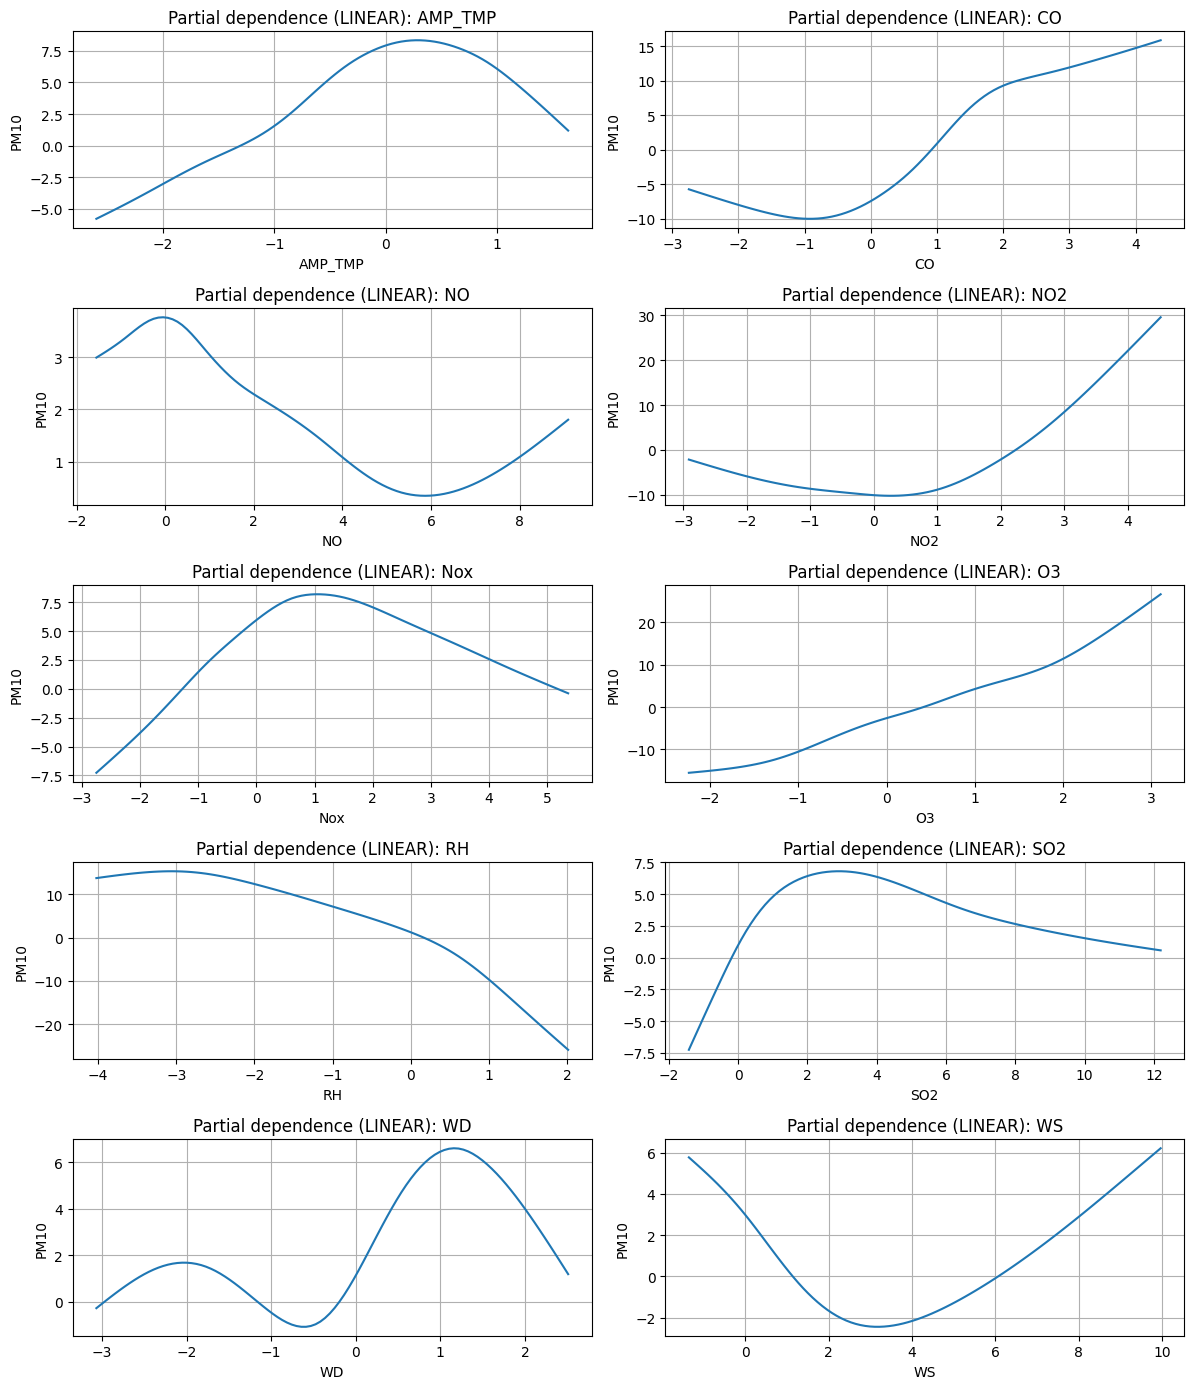



########## GAMMA GAM SUMMARY ##########

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                     39.8577
Link Function:                          LogLink Log Likelihood:                                 -3338.0814
Number of Samples:                          876 AIC:                                             6757.8782
                                                AICc:                                            6761.9788
                                                GCV:                                                0.1169
                                                Scale:                                              0.1354
                                                Pseudo R-Squared:                                    

/tmp/ipython-input-258787602.py:362: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gamma_gam.summary())


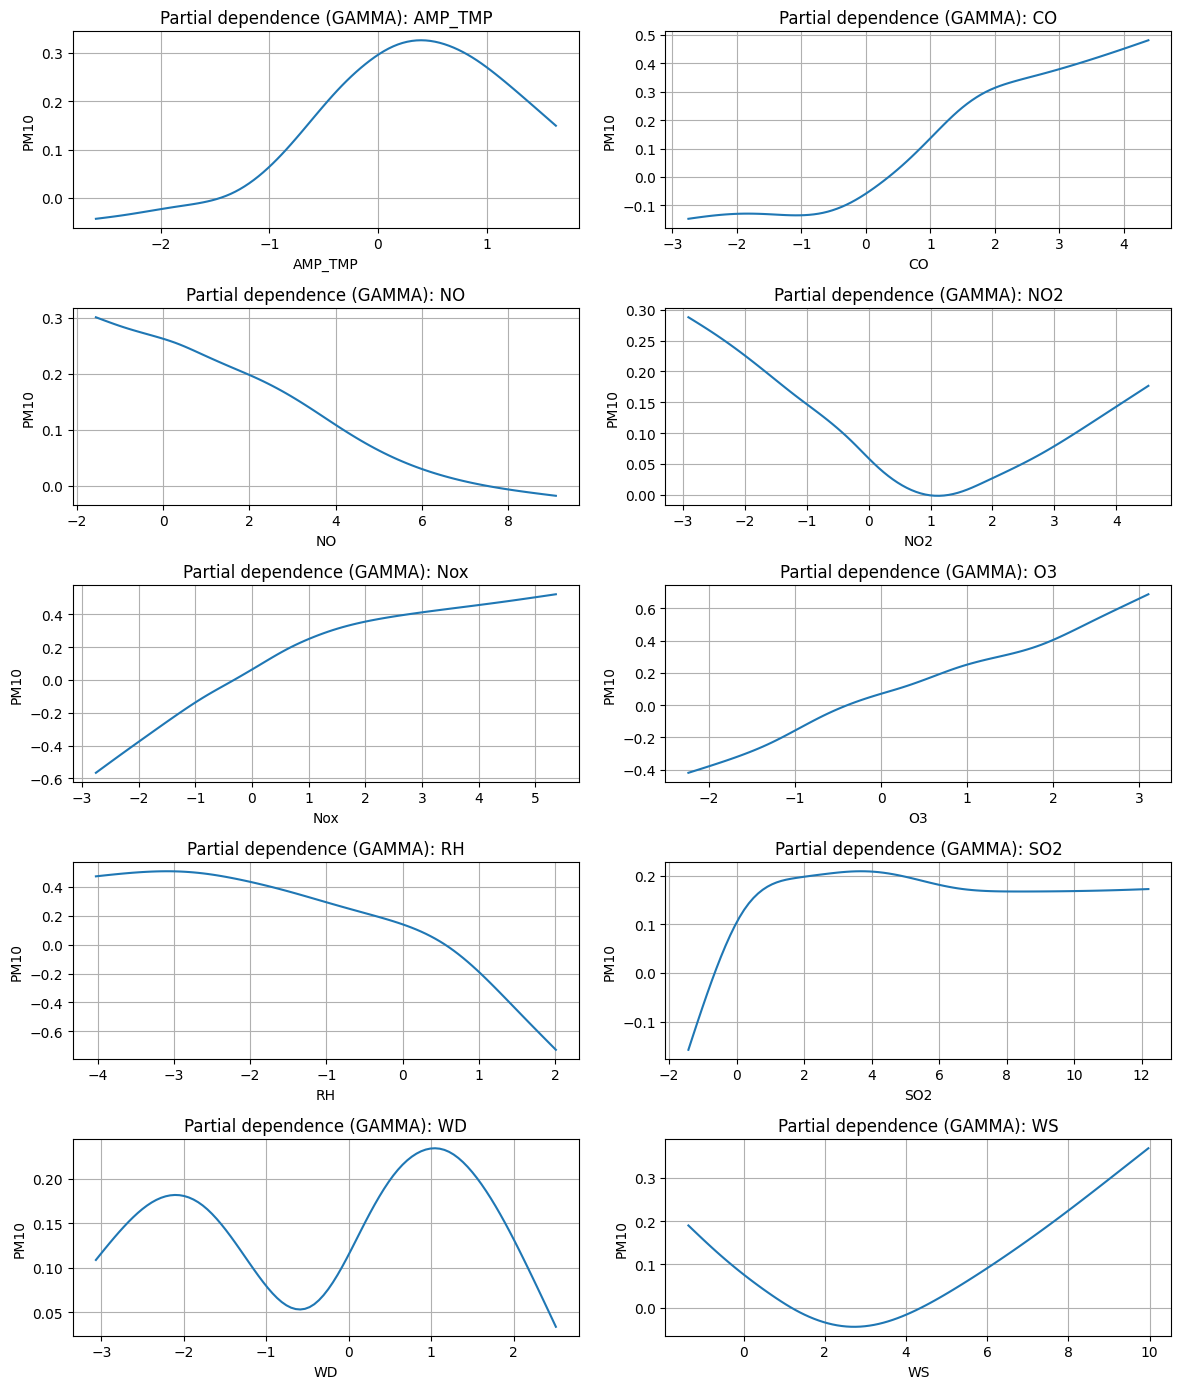



########## LINEAR REGRESSION SUMMARY ##########

Coefficients:  [ 3.14919847  6.28813789 -0.84654658  3.42894022  2.16921503  6.52777979
 -7.39789493  1.46608366  0.46312618 -0.63881731]
Intercept:  37.78859577149925

Test MAE: 10.433382293425508
Test RMSE: 14.707819458208741
Test R²: 0.4241636538376423
Test VAF: 42.49741576943682
0.4241636538376423


########## RANDOM FOREST SUMMARY ##########


Test MAE: 9.88894979499575
Test RMSE: 14.464200777675106
Test R²: 0.443081843977696
Test VAF: 44.540634931591626
0.443081843977696


########## MODEL COMPARISON ##########



,Model,Test R²,Test RMSE,Test MAE,Test VAF %
0,LinearGAM,0.489641,13.846391,9.997249,49.167256
1,GammaGAM,0.461976,14.216723,10.045894,46.320337
2,LinearRegression,0.424164,14.707819,10.433382,42.497416
3,RandomForest,0.443082,14.464201,9.888950,44.540635


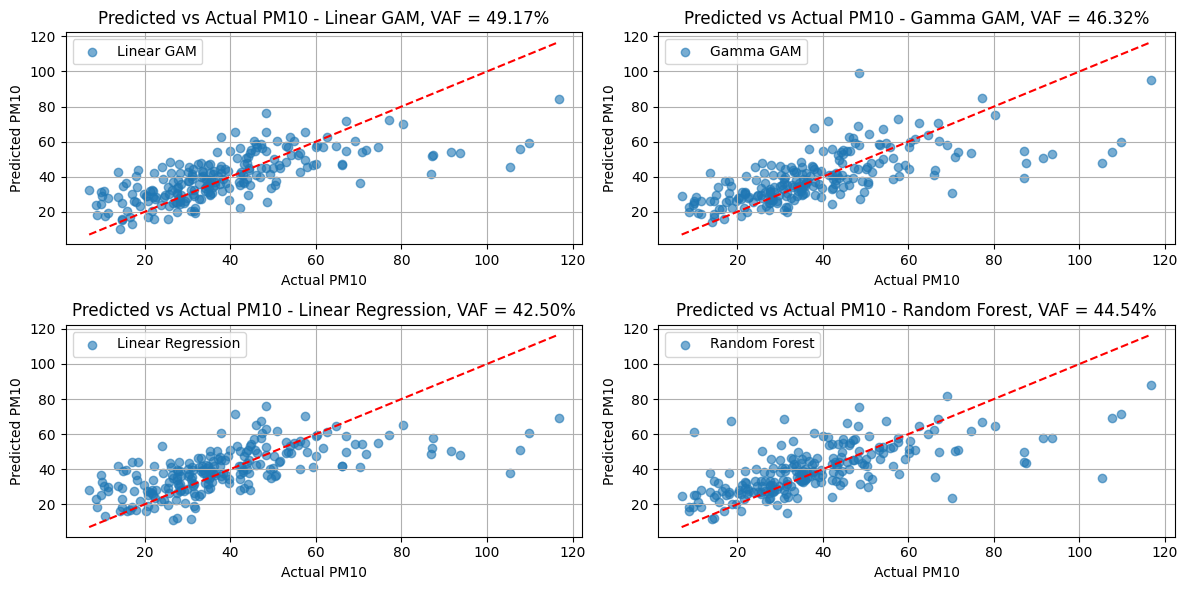

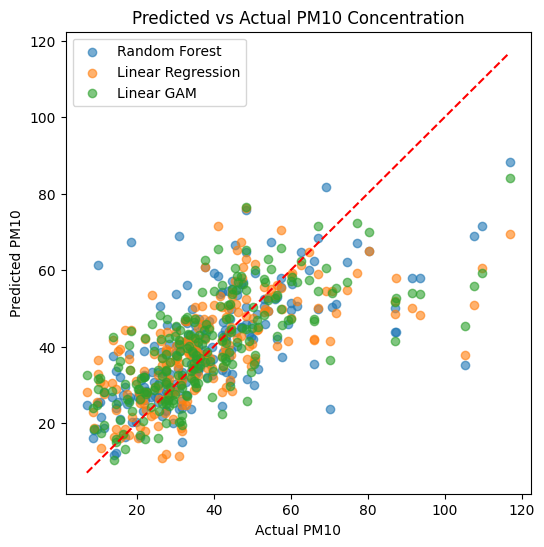

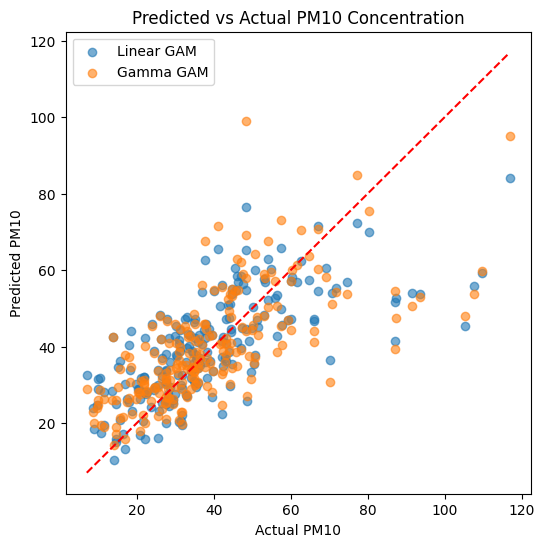

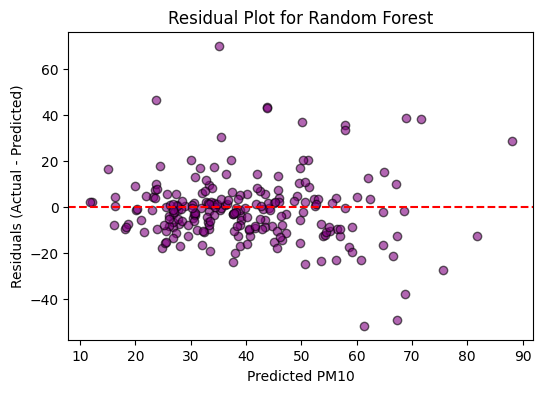

Mean of residuals: -0.9344671250180843
Standard deviation of residuals: 14.433983349344615



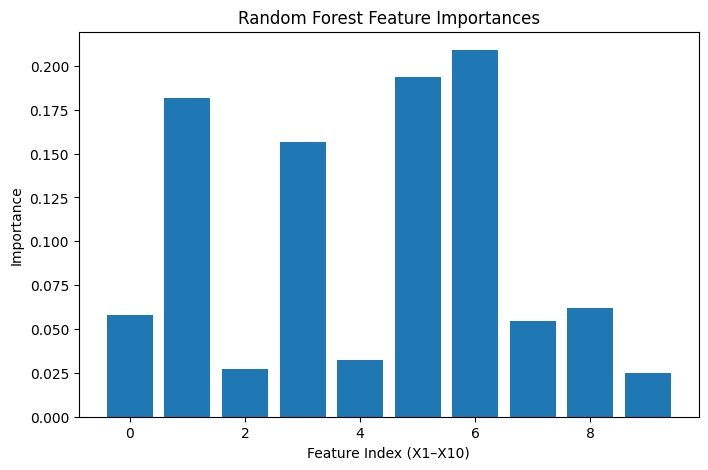

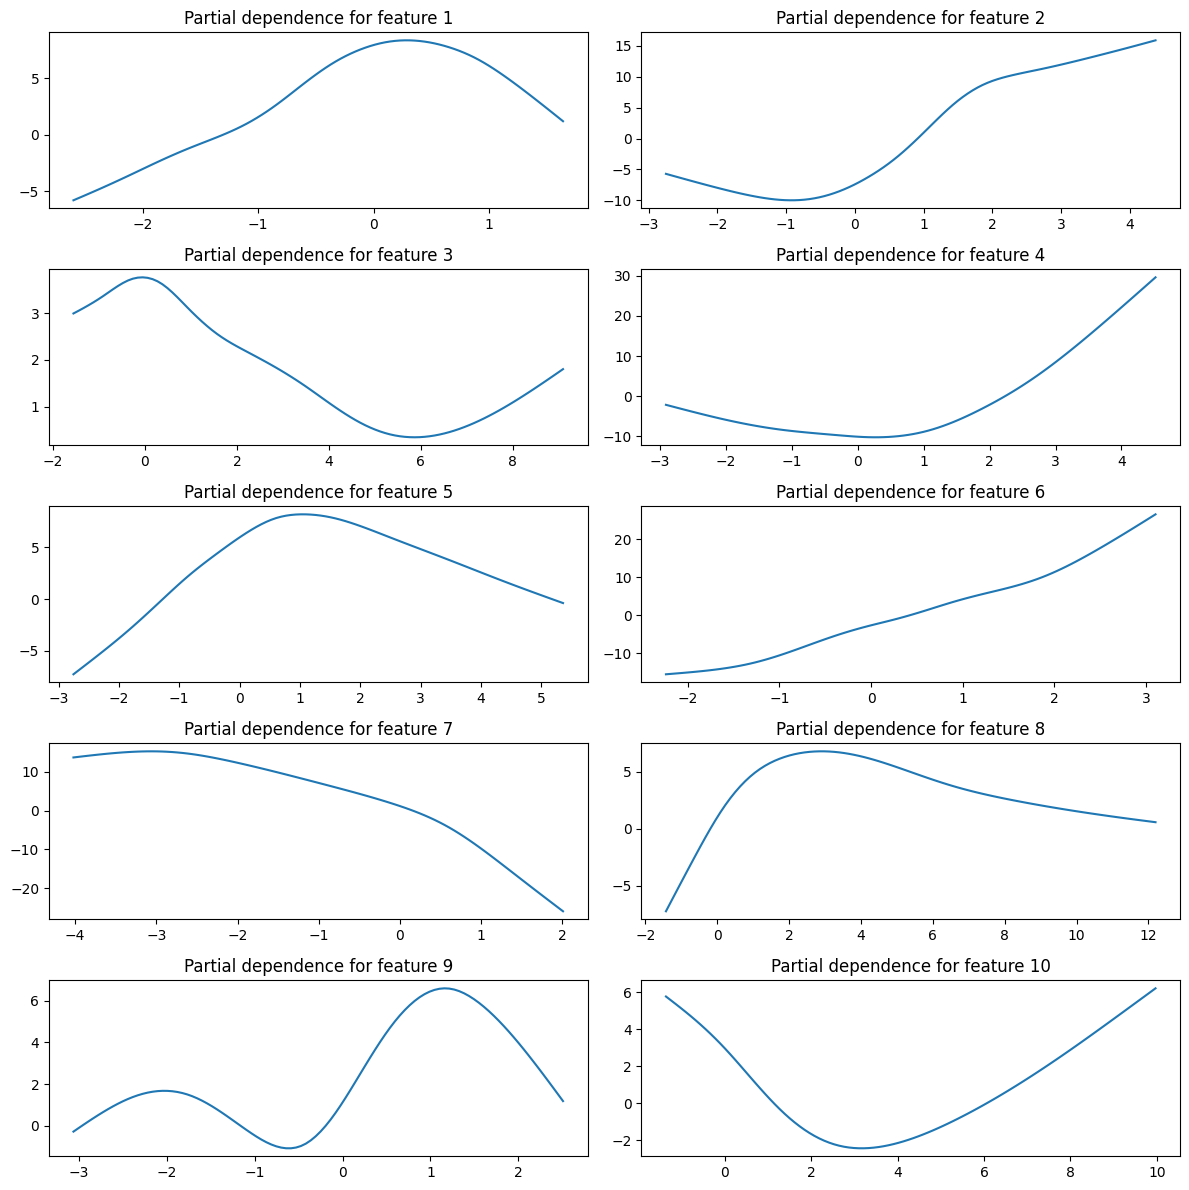


Average 5-Fold CV R² for Random Forest: 0.4555633381192251



In [35]:
####################################################
# LOADING DATA FROM "PM10 air pollution.xlsx"
####################################################
# !pip install openpyxl
from IPython.display import display

# loads  data - comment/ uncomment next two lines to load the file
# from google.colab import files
# uploaded = files.upload()
import pandas as pd
df = pd.read_excel("PM10 air pollution.xlsx")
#df = pd.read_csv("/content/PM10 air pollution.csv")

# displays sample data and other information
print("\n########## FIRST 5 ROWS ##########\n")
display(df.head())

print("\n########## DATA TYPES AND MISSING VALUES ##########\n")
display(df.info())

print("\n########## SIZE OF THE DATASET ##########\n")
display(df.shape)

print("\n########## BASIC STATISTICS ##########\n")
display(df.describe())
print("")

print("\n########## OTHER STATISTICS ##########\n")

other_stats = pd.DataFrame({
    'Min' : df.min(),
    'Max' : df.max(),
    'Mean': df.mean(),
    'Median' : df.median(),
    'Std' : df.std(),
    'Variance' : df.var(),
    'Skewness' : df.skew()
})

display(other_stats)
print("")


####################################################
# OUTLIERS
####################################################

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(5, 2 , figsize=(10, 14))
axs = axs.flatten()

for i, col in enumerate(df.columns[:-1]):
  sns.boxplot(x=df[col], ax=axs[i])
  axs[i].set_title(f"Boxplot of {col}")
  axs[i].grid(True)

plt.tight_layout()
plt.show()
print("")


####################################################
# SPLITTING DATA 80% - TRAIN, 20% - TEST
####################################################

from sklearn.model_selection import train_test_split

X = df.iloc[:,0:10].to_numpy() # X: all rows, 10 columns
y = df.iloc[:,10].to_numpy() # y: all rows, last column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18) # splits data 80% for train, 20% will be used for test

print("\n########## SPLITTING ##########\n")
print("Dimensions of X:", X_train.ndim, X_test.ndim) # prints dimensions of X
print("Dimensions of y:", y_train.ndim, y_test.ndim) # prints dimensions of y

print("Sizes X rows:", X_train.shape[0], X_test.shape[0]) # number of rows
print("Sizes X columns:", X_train.shape[1], X_test.shape[1]) # number of columns

print("Sizes y:", y_train.shape[0], y_test.shape[0]) # number of rows (this is an array, does not have number of columns like X)


####################################################
# PREPROCESSING
####################################################

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on X_train and transform all sets
X_train = scaler.fit_transform(X_train)
# X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


####################################################
# CHECKING DISTRIBUTION FOR GAM
####################################################

print("\n########## DISTRIBUTION ##########\n")
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of y_train
plt.figure(figsize=(8,5))
sns.histplot(y_train, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Histogram of y_train")
plt.xlabel("y values")
plt.ylabel("Frequency")
plt.show()

# KDE function
plt.figure(figsize=(8,5))
sns.kdeplot(y_train, label='Train')
sns.kdeplot(y_test, label='Test')
plt.legend()
plt.title("Distribution of target y across splits")
plt.show()

# Q-Q plot - normal distribution https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
import scipy.stats as stats

stats.probplot(y_train, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of y_train")
plt.show()

# Skewness https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
from scipy.stats import skew

skewness = skew(y_train)
print(f"Skewness of y_train: {skewness:.2f}")

# Checking if all y values are positive
if (y_train > 0).all():
  print("All positive")
else:
  print("Some negative")

# Q-Q plot - gamma distribution
params = stats.gamma.fit(y_train)
stats.probplot(y_train, dist=stats.gamma, sparams=params, plot=plt)
plt.title("Gamma Q-Q Plot for y_train")
plt.show()
print("")


####################################################
# VARIANCE ACCOUNTED FOR FUNCTION
####################################################

def vaf(y_true, y_predicted):
  return (1 - np.var(y_true - y_predicted) / np.var(y_true)) * 100


####################################################
# SETTING UP THE GAM MODEL, TUNING, FITTING, CHECKING RESULTS
####################################################

!pip install pygam

#################### LINEAR ####################

from pygam import LinearGAM, s
from pygam.terms import TermList
import numpy as np

# Create a TermList for all predictors
terms = TermList(*[s(i) for i in range(X_train.shape[1])])
print("Terms: ", terms)

# Set up GAM

lams = [[np.int64(90)], [np.int64(80)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)]]
gam = LinearGAM(terms,lam=lams)


#gam = LinearGAM(terms)
gam.fit(X_train, y_train)

'''
# Tuning https://pygam.readthedocs.io/en/latest/api/gam.html#pygam.pygam.GAM.gridsearch

lam = [80, 90]
#lam = np.logspace(-2, 2, 2)
lams = [lam] * 10
gam.gridsearch(X_train, y_train, lam=lams)
print("Best parameters (LINEAR):", gam.lam)
'''


'''
========== # DEFAULT LINEAR ==========
Test MAE: 10.37211587564785
Test RMSE: 14.235286115217226
Test R²: 0.4605702503593526
Test VAF: 46.43477610247886

========== # 1. lam = np.logspace(-2, 2, 2) ==========
Best parameters (LINEAR): [[np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)]]

Test MAE: 9.988827831403414
Test RMSE: 13.846773831755335
Test R²: 0.4896128982582394
Test VAF: 49.15702784247239

========== #2. lam = [35, 70] ==========
Best parameters (LINEAR): [[np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)]]

Test MAE: 10.035997609916018
Test RMSE: 13.859436989310826
Test R²: 0.48867895253393956
Test VAF: 49.0930621693421

========== #3. lam = [150, 200] ==========
Best parameters (LINEAR): [[np.int64(200)], [np.int64(150)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(150)], [np.int64(150)], [np.int64(200)]]

Test MAE: 9.969635927581203
Test RMSE: 13.882269568413578
Test R²: 0.48699282415577005
Test VAF: 48.858402289481305

========== #4. lam = [80, 90] ==========
Best parameters (LINEAR): [[np.int64(90)], [np.int64(80)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)]]

Test MAE: 9.99724930080658
Test RMSE: 13.846390703392643
Test R²: 0.48964114181471563 <=== BEST
Test VAF: 49.167255535110286

'''

# Display model summary
print("\n########## LINEAR GAM SUMMARY ##########\n")
print(gam.summary())

# Predict on test set
y_test_pred_l = gam.predict(X_test)

# Metrics for LinearGAM

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_test_l = r2_score(y_test, y_test_pred_l)
mae_test_l = mean_absolute_error(y_test, y_test_pred_l)
mse_test_l = mean_squared_error(y_test, y_test_pred_l)
rmse_test_l = np.sqrt(mse_test_l)
vaf_test_l = vaf(y_test, y_test_pred_l)

print("")
print("Test MAE:", mae_test_l)
print("Test RMSE:", rmse_test_l)
print("Test R²:", r2_test_l)
print("Test VAF:", vaf_test_l)
print("")

# Partial dependencies

import matplotlib.pyplot as plt
from pygam.terms import TermList

# Partial dependence plots for each predictor (LINEAR)

predictor_names = df.drop(columns=['PM10']).columns

fig, axs = plt.subplots(5, 2 , figsize=(12, 14))

for i, ax in enumerate(axs.flatten()):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.set_title(f"Partial dependence (LINEAR): {predictor_names[i]}")
    ax.set_ylabel('PM10')
    ax.set_xlabel(predictor_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

print("")

#################### GAMMA ###################

from pygam import GAM, s
from pygam.distributions import GammaDist
from pygam.links import LogLink

# Create TermList for all predictors
terms = TermList(*[s(i) for i in range(X_train.shape[1])])

# Fit GAM with Gamma distribution and Log link

gamma_gam = GAM(terms, distribution=GammaDist(), link=LogLink())


lams = [[np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)]]
gamma_gam = GAM(terms, distribution=GammaDist(), link=LogLink(), lam=lams)


gamma_gam.fit(X_train, y_train)

'''
# Tuning https://pygam.readthedocs.io/en/latest/api/gam.html#pygam.pygam.GAM.gridsearch

lam = [80, 90]
#lam = np.logspace(-2, 2, 2)

lams = [lam] * X_train.shape[1]
gamma_gam.gridsearch(X_train, y_train, lam=lams)
print("Best parameters (GAMMA):", gamma_gam.lam)
'''


'''
Findings: Wery similar values of MAE, RMSE, R², overall lower than for linear gam


========== # DEFAULT GAMMA ==========
Test MAE: 10.269646795031123
Test RMSE: 14.845470123291788
Test R²: 0.41333469665155353
Test VAF: 41.72341888513925

========== # 1. lam = np.logspace(-2, 2, 2) ==========
Best parameters (GAMMA): [[np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)]]

Test MAE: 10.076406632000237
Test RMSE: 14.292721456361477
Test R²: 0.45620857699328365
Test VAF: 45.71575079372041

========== #2. lam = [35, 70] ==========
Best parameters (GAMMA): [[np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)]]

Test MAE: 10.045893741539581
Test RMSE: 14.216724142108923
Test R²: 0.4619761023138528 <==== BEST
Test VAF: 46.32032604266732

========== #3. lam = [150, 200] ==========
Best parameters (GAMMA): [[np.int64(200)], [np.int64(150)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(150)], [np.int64(150)], [np.int64(150)], [np.int64(200)]]

Test MAE: 10.074579557686237
Test RMSE: 14.333499239929822
Test R²: 0.4531012273391526
Test VAF: 45.373275616198995

========== #4. lam = [80, 90] ==========
Best parameters (GAMMA): [[np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(80)], [np.int64(80)], [np.int64(90)]]

Test MAE: 10.072163541033307
Test RMSE: 14.273924643126561
Test R²: 0.45763795130914864
Test VAF: 45.86814506255198
'''

# Display model summary
print("\n########## GAMMA GAM SUMMARY ##########\n")
print(gamma_gam.summary())

# Predict on test set
y_test_pred_g = gamma_gam.predict(X_test)

# Metrics for GammaGAM

r2_test_g = r2_score(y_test, y_test_pred_g)
mae_test_g = mean_absolute_error(y_test, y_test_pred_g)
mse_test_g = mean_squared_error(y_test, y_test_pred_g)
rmse_test_g = np.sqrt(mse_test_g)
vaf_test_g = vaf(y_test, y_test_pred_g)


print("")
print("Test MAE:", mae_test_g)
print("Test RMSE:", rmse_test_g)
print("Test R²:", r2_test_g)
print("Test VAF:", vaf_test_g)
print("")

# Partial dependence plots for each predictor (GAMMA)

predictor_names = df.drop(columns=['PM10']).columns

fig, axs = plt.subplots(5, 2 , figsize=(12, 14))

for i, ax in enumerate(axs.flatten()):
    XX = gamma_gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gamma_gam.partial_dependence(term=i, X=XX))
    ax.set_title(f"Partial dependence (GAMMA): {predictor_names[i]}")
    ax.set_ylabel('PM10')
    ax.set_xlabel(predictor_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

print("")


####################################################
# LINEAR REGRESSION
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
####################################################

from sklearn.linear_model import LinearRegression

print("\n########## LINEAR REGRESSION SUMMARY ##########\n")


linear_reg = LinearRegression().fit(X_train, y_train)
print("Coefficients: ", linear_reg.coef_)
print("Intercept: ",linear_reg.intercept_)

# Predict on validation and test sets
# y_val_pred_lr = linear_reg.predict(X_val)
y_test_pred_lr = linear_reg.predict(X_test)

# Metrics for Linear Regression

# r2_val_lr = r2_score(y_val, y_val_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)
# mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)
# rmse_val_lr = np.sqrt(mse_val_lr)

mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

vaf_test_lr = vaf(y_test, y_test_pred_lr)

# print("Validation MAE:", mae_val_lr)
# print("Validation RMSE:", rmse_val_lr)
# print("Validation R²:", r2_val_lr)
# print(linear_reg.score(X_val,y_val)) # same as R^2
print("")
print("Test MAE:", mae_test_lr)
print("Test RMSE:", rmse_test_lr)
print("Test R²:", r2_test_lr)
print("Test VAF:", vaf_test_lr)
print(linear_reg.score(X_test,y_test)) # same as R^2
print("")

####################################################
# RANDOM FOREST
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
####################################################

from sklearn.ensemble import RandomForestRegressor

print("\n########## RANDOM FOREST SUMMARY ##########\n")

#random_forest = RandomForestRegressor().fit(X_train, y_train)

# RANDOM FOREST (TUNED)
from sklearn.ensemble import RandomForestRegressor

# Tune hyperparameters for better performance
random_forest = RandomForestRegressor(
    n_estimators=300,       # number of trees
    max_depth=10,           # controls tree depth to reduce overfitting
    min_samples_split=5,    # minimum samples required to split a node
    min_samples_leaf=3,     # minimum samples at a leaf node
    random_state=18,        # for reproducibility
    n_jobs=-1               # uses all CPU cores
).fit(X_train, y_train)


# Predict on validation and test sets
# y_val_pred_rf = random_forest.predict(X_val)
y_test_pred_rf = random_forest.predict(X_test)

# Metrics for Random Forest

# r2_val_rf = r2_score(y_val, y_val_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
# mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
# rmse_val_rf = np.sqrt(mse_val_rf)

mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

vaf_test_rf = vaf(y_test, y_test_pred_rf)

# print("Validation MAE:", mae_val_rf)
# print("Validation RMSE:", rmse_val_rf)
# print("Validation R²:", r2_val_rf)
# print(random_forest.score(X_val,y_val)) # same as R^2
print("")
print("Test MAE:", mae_test_rf)
print("Test RMSE:", rmse_test_rf)
print("Test R²:", r2_test_rf)
print("Test VAF:", vaf_test_rf)
print(random_forest.score(X_test,y_test)) # same as R^2
print("")

####################################################
# MODEL COMPARISON SUMMARY TABLE
####################################################
import pandas as pd

results = pd.DataFrame({
    'Model': ['LinearGAM', 'GammaGAM', 'LinearRegression', 'RandomForest'],
#    'Validation R²': [r2_val_l, r2_val_g, r2_val_lr, r2_val_rf],
    'Test R²': [r2_test_l, r2_test_g, r2_test_lr, r2_test_rf],
    'Test RMSE': [rmse_test_l, rmse_test_g, rmse_test_lr, rmse_test_rf],
    'Test MAE': [mae_test_l, mae_test_g, mae_test_lr, mae_test_rf],
    'Test VAF %': [vaf_test_l, vaf_test_g, vaf_test_lr, vaf_test_rf]
})

print("\n########## MODEL COMPARISON ##########\n")
display(results)
print("")

####################################################
# PREDICTED VS ACTUAL VALUES
####################################################
import matplotlib.pyplot as plt

### LINEAR GAM, GAMMA GAM, RANDOM FOREST AND LINEAR REGRESSION ALL SEPARATE FOR TEST

models = ['Linear GAM', 'Gamma GAM', 'Linear Regression', 'Random Forest']
predictions = [y_test_pred_l, y_test_pred_g, y_test_pred_lr, y_test_pred_rf]
vafs = [vaf_test_l, vaf_test_g, vaf_test_lr, vaf_test_rf]

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, ax in enumerate(axs.flatten()):
  ax.scatter(y_test, predictions[i], alpha=0.6, label=models[i])
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  ax.set_xlabel("Actual PM10")
  ax.set_ylabel("Predicted PM10")
  ax.set_title(f"Predicted vs Actual PM10 - {models[i]}, VAF = {vafs[i]:.2f}%" )
  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()
print("")


### LINEAR GAM, RANDOM FOREST AND LINEAR REGRESSION

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_test_pred_l, alpha=0.6, label='Linear GAM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("Predicted vs Actual PM10 Concentration")
plt.legend()
plt.show()
print("")

### GAM: LINEAR AND GAMMA

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_l, alpha=0.6, label='Linear GAM')
plt.scatter(y_test, y_test_pred_g, alpha=0.6, label='Gamma GAM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("Predicted vs Actual PM10 Concentration")
plt.legend()
plt.show()
print("")

####################################################
# RESIDUAL PLOT (ERROR ANALYSIS)
####################################################
residuals = y_test - y_test_pred_rf

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred_rf, residuals, alpha=0.6, color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for Random Forest")
plt.xlabel("Predicted PM10")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

# Optional: summary statistics for residuals
import numpy as np
print("Mean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))
print("")


####################################################
# FEATURE IMPORTANCE (RANDOM FOREST)
####################################################
import numpy as np

importances = random_forest.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances)
plt.title("Random Forest Feature Importances")
plt.xlabel("Feature Index (X1–X10)")
plt.ylabel("Importance")
plt.show()
print("")

####################################################
# GAM PARTIAL DEPENDENCE PLOTS (INTERPRETATION)
####################################################
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i, ax in enumerate(axs.flatten()):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.set_title(f"Partial dependence for feature {i+1}")
plt.tight_layout()
plt.show()
print("")

####################################################
# RANDOM FOREST CROSS-VALIDATION
####################################################
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X, y, cv=5, scoring='r2')
print("Average 5-Fold CV R² for Random Forest:", scores.mean())
print("")




